### 본 매뉴얼은 한국부동산원의 지역별 주택매매가격지수 데이터를 Pandas를 이용해 전처리하는 방법에 대해 다룬다.

# 한국부동산원

- 웹페이지 https://www.reb.or.kr/r-one/main.do

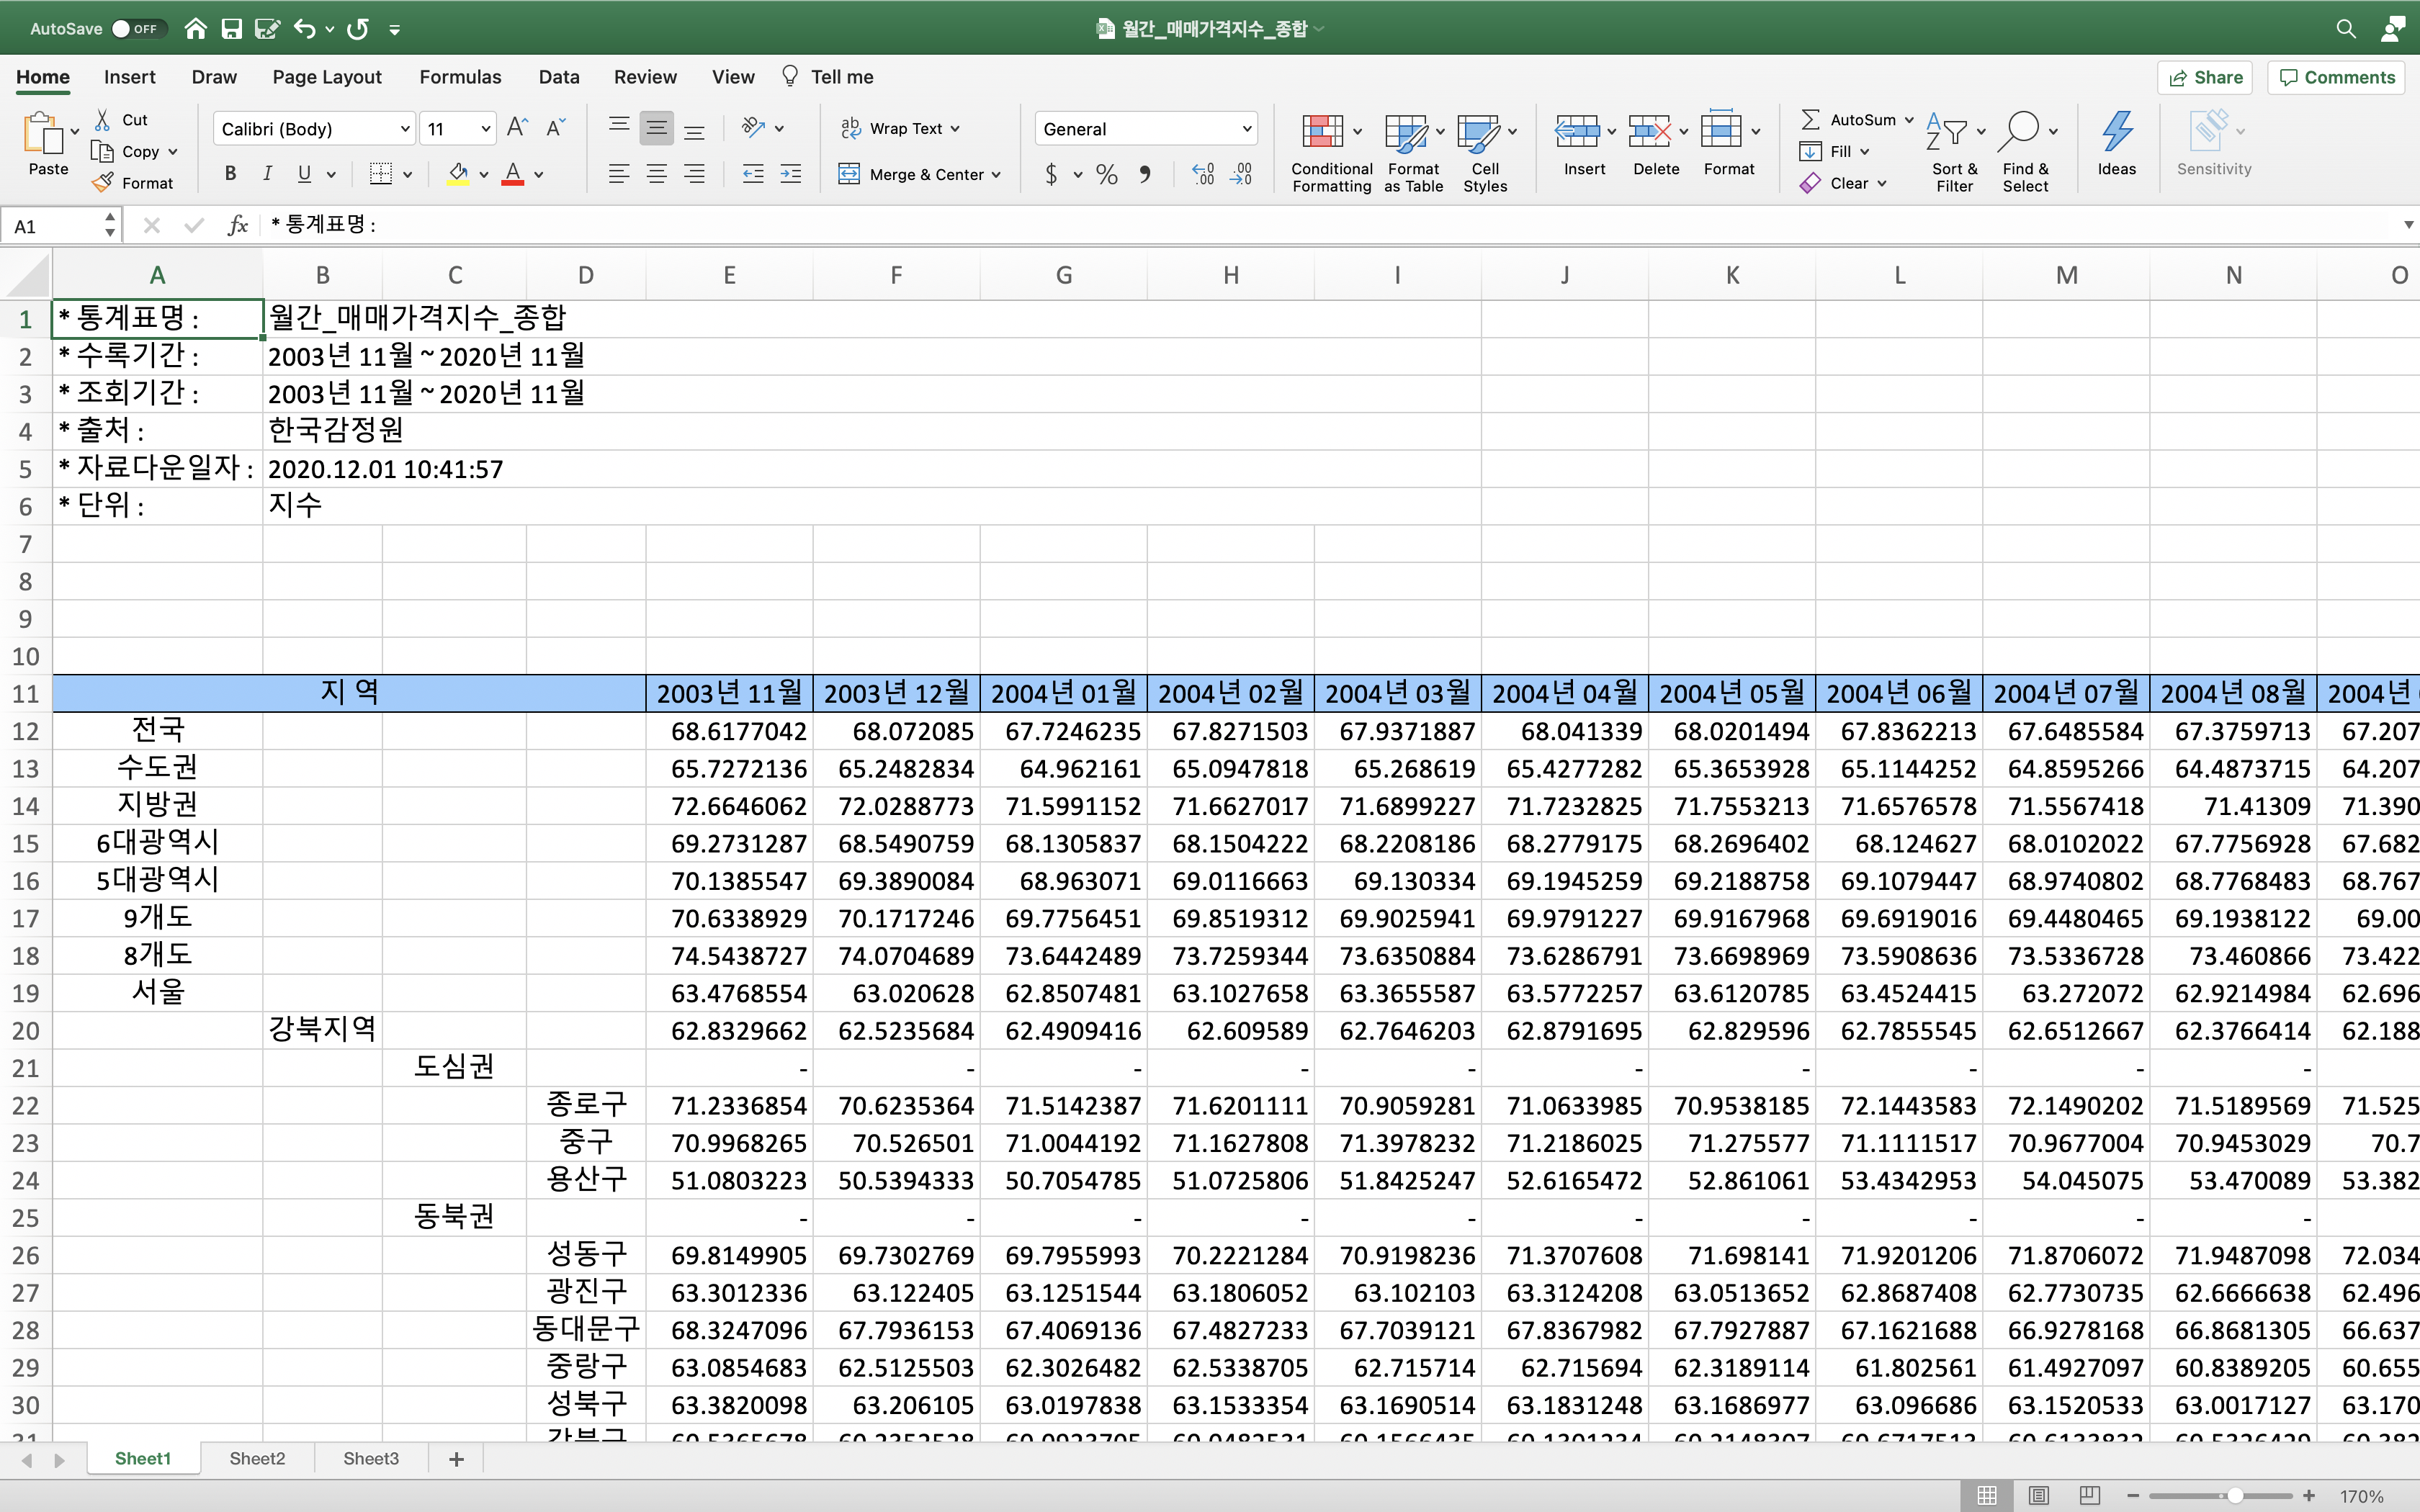

In [1]:
from IPython.display import Image

Image('img/reb_xlsx.png', width=1000)

## 데이터 불러오기
pandas의 read_excel 함수를 이용해 위 이미지의 한국부동산원 데이터를 불러온다. 불러오고자 하는 데이터는 Sheet1이며, 첫 10개 행은 실제 분석에 불필요하므로 skiprow 인자를 이용해 제외한다.
- Sheet1 시트 입수
- 첫 10개 행 제외

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('data/reb.xlsx', sheet_name='Sheet1', skiprows=10)

In [6]:
df.head(15)

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,...,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월
0,전국,NaN,NaN,NaN,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,...,101.473629,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058
1,수도권,NaN,NaN,NaN,65.727214,65.248283,64.962161,65.094782,65.268619,65.427728,...,104.983763,105.956932,106.500467,106.767341,107.295471,108.162637,108.730402,109.200187,109.523817,110.064184
2,지방권,NaN,NaN,NaN,72.664606,72.028877,71.599115,71.662702,71.689923,71.723282,...,98.389117,98.577374,98.628994,98.65803,98.9871,99.418084,99.840749,100.254391,100.592939,101.174575
3,6대광역시,NaN,NaN,NaN,69.273129,68.549076,68.130584,68.150422,68.220819,68.277917,...,101.690027,102.269215,102.594644,102.783843,103.290726,103.756154,104.155578,104.705335,105.19987,106.121624
4,5대광역시,NaN,NaN,NaN,70.138555,69.389008,68.963071,69.011666,69.130334,69.194526,...,101.627626,101.892867,101.995889,102.061216,102.48142,102.938144,103.395693,104.038408,104.611825,105.671593
5,9개도,NaN,NaN,NaN,70.633893,70.171725,69.775645,69.851931,69.902594,69.979123,...,99.118383,99.72377,100.047827,100.225083,100.662886,101.269683,101.719912,102.105058,102.390931,102.889564
6,8개도,NaN,NaN,NaN,74.543873,74.070469,73.644249,73.725934,73.635088,73.628679,...,96.18769,96.245469,96.235305,96.23606,96.470969,96.783379,97.03524,97.236312,97.407282,97.689147
7,서울,NaN,NaN,NaN,63.476855,63.020628,62.850748,63.102766,63.365559,63.577226,...,108.708096,108.851816,108.830591,108.737396,108.878312,109.655113,110.119263,110.419274,110.596536,110.78195
8,NaN,강북지역,NaN,NaN,62.832966,62.523568,62.490942,62.609589,62.76462,62.879169,...,108.001469,108.24648,108.337449,108.327749,108.454405,109.226095,109.739937,110.092041,110.316839,110.545971
9,NaN,NaN,도심권,NaN,-,-,-,-,-,-,...,110.436115,110.611923,110.628382,110.601511,110.729517,111.241389,111.632766,111.935565,112.115223,112.328064


위 데이터 프레임(df)에서 나타는 복잡한 지역 이름 구조를 `전국, 수도권, 지방권, 6대광역시, 5대광역시, 9개도, 8개도, 서울, 서울-강북지역, 서울-도심권, 서울-종로구, 서울-중구 등`과 같이 다루기 편한 형태로 아래 프로세스에 따라 전처리 한다. 한줄씩 실행해보고 빈 셀에 df를 입력하고 실행해 어떻게 변환되는지 확인해 보는 것을 추천한다.
- '지역' 라벨을 아래 방향으로 채움 df.iloc[:, 0].fillna(method='ffill', axis=0)
- 첫 4개 칼럼의 NaN을 빈 문자열로 대체 df.iloc[:, 0:4].fillna('')
- 첫 4개 칼럼을 '-'으로 결함하여 새로운 칼럼 생성 df.iloc[:, 0:4].agg('-'.join, axis=1)
- '지역1-지역2' 유형 이외의 '-' 제거

첫번째 열의 NaN을 상위 지역이름으로 채우기(예를들어, 위의 df의 8~14 행의 NaN을 서울로 채운다.)

In [7]:
df.iloc[:, 0] = df.iloc[:, 0].fillna(method = 'ffill', axis = 0)

In [11]:
df.head(15)

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,...,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월
0,전국,NaN,NaN,NaN,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,...,101.473629,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058
1,수도권,NaN,NaN,NaN,65.727214,65.248283,64.962161,65.094782,65.268619,65.427728,...,104.983763,105.956932,106.500467,106.767341,107.295471,108.162637,108.730402,109.200187,109.523817,110.064184
2,지방권,NaN,NaN,NaN,72.664606,72.028877,71.599115,71.662702,71.689923,71.723282,...,98.389117,98.577374,98.628994,98.65803,98.9871,99.418084,99.840749,100.254391,100.592939,101.174575
3,6대광역시,NaN,NaN,NaN,69.273129,68.549076,68.130584,68.150422,68.220819,68.277917,...,101.690027,102.269215,102.594644,102.783843,103.290726,103.756154,104.155578,104.705335,105.19987,106.121624
4,5대광역시,NaN,NaN,NaN,70.138555,69.389008,68.963071,69.011666,69.130334,69.194526,...,101.627626,101.892867,101.995889,102.061216,102.48142,102.938144,103.395693,104.038408,104.611825,105.671593
5,9개도,NaN,NaN,NaN,70.633893,70.171725,69.775645,69.851931,69.902594,69.979123,...,99.118383,99.72377,100.047827,100.225083,100.662886,101.269683,101.719912,102.105058,102.390931,102.889564
6,8개도,NaN,NaN,NaN,74.543873,74.070469,73.644249,73.725934,73.635088,73.628679,...,96.18769,96.245469,96.235305,96.23606,96.470969,96.783379,97.03524,97.236312,97.407282,97.689147
7,서울,NaN,NaN,NaN,63.476855,63.020628,62.850748,63.102766,63.365559,63.577226,...,108.708096,108.851816,108.830591,108.737396,108.878312,109.655113,110.119263,110.419274,110.596536,110.78195
8,서울,강북지역,NaN,NaN,62.832966,62.523568,62.490942,62.609589,62.76462,62.879169,...,108.001469,108.24648,108.337449,108.327749,108.454405,109.226095,109.739937,110.092041,110.316839,110.545971
9,서울,NaN,도심권,NaN,-,-,-,-,-,-,...,110.436115,110.611923,110.628382,110.601511,110.729517,111.241389,111.632766,111.935565,112.115223,112.328064


지역 이름을 나타내는 첫 4개 열의 NaN을 빈 문자열로 대체하기

In [14]:
df.iloc[:, 0:4] = df.iloc[:, 0:4].fillna('')

In [15]:
df

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,...,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월
0,전국,,,,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,...,101.473629,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058
1,수도권,,,,65.727214,65.248283,64.962161,65.094782,65.268619,65.427728,...,104.983763,105.956932,106.500467,106.767341,107.295471,108.162637,108.730402,109.200187,109.523817,110.064184
2,지방권,,,,72.664606,72.028877,71.599115,71.662702,71.689923,71.723282,...,98.389117,98.577374,98.628994,98.65803,98.9871,99.418084,99.840749,100.254391,100.592939,101.174575
3,6대광역시,,,,69.273129,68.549076,68.130584,68.150422,68.220819,68.277917,...,101.690027,102.269215,102.594644,102.783843,103.290726,103.756154,104.155578,104.705335,105.19987,106.121624
4,5대광역시,,,,70.138555,69.389008,68.963071,69.011666,69.130334,69.194526,...,101.627626,101.892867,101.995889,102.061216,102.48142,102.938144,103.395693,104.038408,104.611825,105.671593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,경남,거제시,,,49.338324,51.335809,50.926889,52.829644,53.710648,53.616574,...,82.516557,82.439693,82.359544,82.218803,82.189345,82.790701,83.074988,83.178192,83.191118,82.942282
224,경남,양산시,,,71.000725,69.899066,69.618905,69.500128,69.674401,69.868392,...,95.785761,95.601377,95.460383,95.372065,95.286078,95.184425,94.868434,94.803575,94.933949,95.118865
225,제주,,,,98.494929,98.452457,93.789393,91.836958,87.98395,87.386914,...,97.749726,97.501271,97.215558,96.941172,96.71273,96.572757,96.477005,96.392664,96.284012,96.224416
226,제주,제주시,,,101.135734,101.092122,96.304034,94.299252,90.342939,89.729895,...,97.346351,97.108594,96.845631,96.584617,96.380495,96.255999,96.179247,96.12884,96.05557,96.004039


지역 이름을 `-`으로 결합하여 `R`이라는 이름의 새로운 열을 생성

In [16]:
df['R'] = df.iloc[:, 0:4].agg('-'.join, axis=1)

In [17]:
df

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,...,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월,R
0,전국,,,,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,...,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058,전국---
1,수도권,,,,65.727214,65.248283,64.962161,65.094782,65.268619,65.427728,...,105.956932,106.500467,106.767341,107.295471,108.162637,108.730402,109.200187,109.523817,110.064184,수도권---
2,지방권,,,,72.664606,72.028877,71.599115,71.662702,71.689923,71.723282,...,98.577374,98.628994,98.65803,98.9871,99.418084,99.840749,100.254391,100.592939,101.174575,지방권---
3,6대광역시,,,,69.273129,68.549076,68.130584,68.150422,68.220819,68.277917,...,102.269215,102.594644,102.783843,103.290726,103.756154,104.155578,104.705335,105.19987,106.121624,6대광역시---
4,5대광역시,,,,70.138555,69.389008,68.963071,69.011666,69.130334,69.194526,...,101.892867,101.995889,102.061216,102.48142,102.938144,103.395693,104.038408,104.611825,105.671593,5대광역시---
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,경남,거제시,,,49.338324,51.335809,50.926889,52.829644,53.710648,53.616574,...,82.439693,82.359544,82.218803,82.189345,82.790701,83.074988,83.178192,83.191118,82.942282,경남-거제시--
224,경남,양산시,,,71.000725,69.899066,69.618905,69.500128,69.674401,69.868392,...,95.601377,95.460383,95.372065,95.286078,95.184425,94.868434,94.803575,94.933949,95.118865,경남-양산시--
225,제주,,,,98.494929,98.452457,93.789393,91.836958,87.98395,87.386914,...,97.501271,97.215558,96.941172,96.71273,96.572757,96.477005,96.392664,96.284012,96.224416,제주---
226,제주,제주시,,,101.135734,101.092122,96.304034,94.299252,90.342939,89.729895,...,97.108594,96.845631,96.584617,96.380495,96.255999,96.179247,96.12884,96.05557,96.004039,제주-제주시--


`지역1-지역2` 유형외에 불필요하게 붙은 `-` 제거(예를들어, `제주-서귀포시--`에서 오른쪽 `--` 제거)

In [18]:
df['R'] = df['R'].str.rstrip('-')

In [19]:
df

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,...,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월,R
0,전국,,,,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,...,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058,전국
1,수도권,,,,65.727214,65.248283,64.962161,65.094782,65.268619,65.427728,...,105.956932,106.500467,106.767341,107.295471,108.162637,108.730402,109.200187,109.523817,110.064184,수도권
2,지방권,,,,72.664606,72.028877,71.599115,71.662702,71.689923,71.723282,...,98.577374,98.628994,98.65803,98.9871,99.418084,99.840749,100.254391,100.592939,101.174575,지방권
3,6대광역시,,,,69.273129,68.549076,68.130584,68.150422,68.220819,68.277917,...,102.269215,102.594644,102.783843,103.290726,103.756154,104.155578,104.705335,105.19987,106.121624,6대광역시
4,5대광역시,,,,70.138555,69.389008,68.963071,69.011666,69.130334,69.194526,...,101.892867,101.995889,102.061216,102.48142,102.938144,103.395693,104.038408,104.611825,105.671593,5대광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,경남,거제시,,,49.338324,51.335809,50.926889,52.829644,53.710648,53.616574,...,82.439693,82.359544,82.218803,82.189345,82.790701,83.074988,83.178192,83.191118,82.942282,경남-거제시
224,경남,양산시,,,71.000725,69.899066,69.618905,69.500128,69.674401,69.868392,...,95.601377,95.460383,95.372065,95.286078,95.184425,94.868434,94.803575,94.933949,95.118865,경남-양산시
225,제주,,,,98.494929,98.452457,93.789393,91.836958,87.98395,87.386914,...,97.501271,97.215558,96.941172,96.71273,96.572757,96.477005,96.392664,96.284012,96.224416,제주
226,제주,제주시,,,101.135734,101.092122,96.304034,94.299252,90.342939,89.729895,...,97.108594,96.845631,96.584617,96.380495,96.255999,96.179247,96.12884,96.05557,96.004039,제주-제주시


`지역1---지역2` 또는 `지역1--지역2` 형식을 `지역1-지역1` 형태로 변환

In [20]:
df['R'] = df['R'].str.replace('---', '-').str.replace('--', '-')

In [21]:
df.head(15)

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,...,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월,R
0,전국,,,,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,...,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058,전국
1,수도권,,,,65.727214,65.248283,64.962161,65.094782,65.268619,65.427728,...,105.956932,106.500467,106.767341,107.295471,108.162637,108.730402,109.200187,109.523817,110.064184,수도권
2,지방권,,,,72.664606,72.028877,71.599115,71.662702,71.689923,71.723282,...,98.577374,98.628994,98.65803,98.9871,99.418084,99.840749,100.254391,100.592939,101.174575,지방권
3,6대광역시,,,,69.273129,68.549076,68.130584,68.150422,68.220819,68.277917,...,102.269215,102.594644,102.783843,103.290726,103.756154,104.155578,104.705335,105.19987,106.121624,6대광역시
4,5대광역시,,,,70.138555,69.389008,68.963071,69.011666,69.130334,69.194526,...,101.892867,101.995889,102.061216,102.48142,102.938144,103.395693,104.038408,104.611825,105.671593,5대광역시
5,9개도,,,,70.633893,70.171725,69.775645,69.851931,69.902594,69.979123,...,99.72377,100.047827,100.225083,100.662886,101.269683,101.719912,102.105058,102.390931,102.889564,9개도
6,8개도,,,,74.543873,74.070469,73.644249,73.725934,73.635088,73.628679,...,96.245469,96.235305,96.23606,96.470969,96.783379,97.03524,97.236312,97.407282,97.689147,8개도
7,서울,,,,63.476855,63.020628,62.850748,63.102766,63.365559,63.577226,...,108.851816,108.830591,108.737396,108.878312,109.655113,110.119263,110.419274,110.596536,110.78195,서울
8,서울,강북지역,,,62.832966,62.523568,62.490942,62.609589,62.76462,62.879169,...,108.24648,108.337449,108.327749,108.454405,109.226095,109.739937,110.092041,110.316839,110.545971,서울-강북지역
9,서울,,도심권,,-,-,-,-,-,-,...,110.611923,110.628382,110.601511,110.729517,111.241389,111.632766,111.935565,112.115223,112.328064,서울-도심권


지역 이름이 의도한 형태로 잘 변환되었는지 확인

In [24]:
df['R'].unique()

array(['전국', '수도권', '지방권', '6대광역시', '5대광역시', '9개도', '8개도', '서울',
       '서울-강북지역', '서울-도심권', '서울-종로구', '서울-중구', '서울-용산구', '서울-동북권',
       '서울-성동구', '서울-광진구', '서울-동대문구', '서울-중랑구', '서울-성북구', '서울-강북구',
       '서울-도봉구', '서울-노원구', '서울-서북권', '서울-은평구', '서울-서대문구', '서울-마포구',
       '서울-강남지역', '서울-서남권', '서울-양천구', '서울-강서구', '서울-구로구', '서울-금천구',
       '서울-영등포구', '서울-동작구', '서울-관악구', '서울-동남권', '서울-서초구', '서울-강남구',
       '서울-송파구', '서울-강동구', '경기', '경기-경부1권', '경기-과천시', '경기-안양시', '경기-만안구',
       '경기-동안구', '경기-성남시', '경기-수정구', '경기-중원구', '경기-분당구', '경기-군포시',
       '경기-의왕시', '경기-경부2권', '경기-안성시', '경기-용인시', '경기-처인구', '경기-기흥구',
       '경기-수지구', '경기-수원시', '경기-장안구', '경기-권선구', '경기-팔달구', '경기-영통구',
       '경기-서해안권', '경기-부천시', '경기-안산시', '경기-상록구', '경기-단원구', '경기-시흥시',
       '경기-광명시', '경기-화성시', '경기-오산시', '경기-평택시', '경기-동부1권', '경기-남양주시',
       '경기-구리시', '경기-하남시', '경기-광주시', '경기-동부2권', '경기-이천시', '경기-여주시',
       '경기-경의권', '경기-김포시', '경기-고양시', '경기-덕양구', '경기-일산동구', '경기-일산서구',
       '경기-파주시', '경기-경원권', '경기-포천시', '경기-동두천시'

자주 사용하는 지역 리스트 만들기

In [25]:
m6 = ['부산', '대구', '인천', '광주', '대전', '울산']
p8 = ['강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
sma = ['서울', '경기', '인천']
nsm = ['부산', '대구', '광주', '대전', '울산', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종']
a4 = ['전국', '수도권', '6대광역시', '8개도']

r17_long = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
            '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시',
            '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
r17_short = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산',
             '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
r17_en = ['GW', 'GG', 'GN', 'GB', 'GJ', 'DG', 'DJ', 'BS',
          'SE', 'SJ', 'US', 'IC', 'JN', 'JB', 'JJ', 'CN', 'CB']
r17_long2short = dict(zip(r17_long, r17_short))
r17_kr2en = dict(zip(r17_short, r17_en))

위에서 생성한 `R`이름의 열을 df의 새로운 인덱스로 지정하고, 기존 지역 이름 열은 제거

In [26]:
df = df.set_index('R')

In [27]:
df = df.iloc[:, 4:]

In [28]:
df

,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,2004년 05월,2004년 06월,2004년 07월,2004년 08월,...,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월
R,,,,,,,,,,,,,,,,,,,,,
전국,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,68.020149,67.836221,67.648558,67.375971,...,101.473629,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058
수도권,65.727214,65.248283,64.962161,65.094782,65.268619,65.427728,65.365393,65.114425,64.859527,64.487371,...,104.983763,105.956932,106.500467,106.767341,107.295471,108.162637,108.730402,109.200187,109.523817,110.064184
지방권,72.664606,72.028877,71.599115,71.662702,71.689923,71.723282,71.755321,71.657658,71.556742,71.41309,...,98.389117,98.577374,98.628994,98.65803,98.9871,99.418084,99.840749,100.254391,100.592939,101.174575
6대광역시,69.273129,68.549076,68.130584,68.150422,68.220819,68.277917,68.26964,68.124627,68.010202,67.775693,...,101.690027,102.269215,102.594644,102.783843,103.290726,103.756154,104.155578,104.705335,105.19987,106.121624
5대광역시,70.138555,69.389008,68.963071,69.011666,69.130334,69.194526,69.218876,69.107945,68.97408,68.776848,...,101.627626,101.892867,101.995889,102.061216,102.48142,102.938144,103.395693,104.038408,104.611825,105.671593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
경남-거제시,49.338324,51.335809,50.926889,52.829644,53.710648,53.616574,53.181687,53.151236,53.174715,53.033613,...,82.516557,82.439693,82.359544,82.218803,82.189345,82.790701,83.074988,83.178192,83.191118,82.942282
경남-양산시,71.000725,69.899066,69.618905,69.500128,69.674401,69.868392,70.256599,70.142772,70.046205,69.869319,...,95.785761,95.601377,95.460383,95.372065,95.286078,95.184425,94.868434,94.803575,94.933949,95.118865
제주,98.494929,98.452457,93.789393,91.836958,87.98395,87.386914,86.90484,86.196348,84.184782,83.74487,...,97.749726,97.501271,97.215558,96.941172,96.71273,96.572757,96.477005,96.392664,96.284012,96.224416


2003년 11월 ~ 2020년 11월로 되어있는 열 라벨을 표준적인 파이썬 datetimeindex로 변환하고, transpose
- '년 ' -> '-'
- '월' -> '' (빈문자열)
- df.columns = pd.to_datetime(df.columns)
- df = df.T

In [29]:
df.columns = df.columns.str.replace('년 ', '-')

In [32]:
df.head(1)

,2003-11월,2003-12월,2004-01월,2004-02월,2004-03월,2004-04월,2004-05월,2004-06월,2004-07월,2004-08월,...,2020-02월,2020-03월,2020-04월,2020-05월,2020-06월,2020-07월,2020-08월,2020-09월,2020-10월,2020-11월
R,,,,,,,,,,,,,,,,,,,,,
전국,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,68.020149,67.836221,67.648558,67.375971,...,101.473629,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058


In [33]:
df.columns = df.columns.str.replace('월', '')

In [34]:
df.head(1)

,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,...,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
R,,,,,,,,,,,,,,,,,,,,,
전국,68.617704,68.072085,67.724623,67.82715,67.937189,68.041339,68.020149,67.836221,67.648558,67.375971,...,101.473629,102.023739,102.30141,102.439549,102.860048,103.490924,103.980226,104.419841,104.751838,105.315058


In [35]:
df.columns = pd.to_datetime(df.columns)

In [36]:
df = df.T

In [37]:
df.head(10)

R,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울-강북지역,서울-도심권,...,경남-진주시,경남-통영시,경남-사천시,경남-김해시,경남-밀양시,경남-거제시,경남-양산시,제주,제주-제주시,제주-서귀포시
2003-11-01,68.617704,65.727214,72.664606,69.273129,70.138555,70.633893,74.543873,63.476855,62.832966,-,...,76.320188,-,-,70.198215,-,49.338324,71.000725,98.494929,101.135734,-
2003-12-01,68.072085,65.248283,72.028877,68.549076,69.389008,70.171725,74.070469,63.020628,62.523568,-,...,76.572567,-,-,70.338107,-,51.335809,69.899066,98.452457,101.092122,-
2004-01-01,67.724623,64.962161,71.599115,68.130584,68.963071,69.775645,73.644249,62.850748,62.490942,-,...,76.178095,-,-,70.529537,-,50.926889,69.618905,93.789393,96.304034,-
2004-02-01,67.82715,65.094782,71.662702,68.150422,69.011666,69.851931,73.725934,63.102766,62.609589,-,...,76.678682,-,-,70.401127,-,52.829644,69.500128,91.836958,94.299252,-
2004-03-01,67.937189,65.268619,71.689923,68.220819,69.130334,69.902594,73.635088,63.365559,62.76462,-,...,77.220733,-,-,70.738761,-,53.710648,69.674401,87.98395,90.342939,-
2004-04-01,68.041339,65.427728,71.723282,68.277917,69.194526,69.979123,73.628679,63.577226,62.879169,-,...,77.318526,-,-,70.69575,-,53.616574,69.868392,87.386914,89.729895,-
2004-05-01,68.020149,65.365393,71.755321,68.26964,69.218876,69.916797,73.669897,63.612078,62.829596,-,...,77.574055,-,-,70.794594,-,53.181687,70.256599,86.90484,89.234896,-
2004-06-01,67.836221,65.114425,71.657658,68.124627,69.107945,69.691902,73.590864,63.452441,62.785555,-,...,78.053571,-,-,70.705886,-,53.151236,70.142772,86.196348,88.507409,-
2004-07-01,67.648558,64.859527,71.556742,68.010202,68.97408,69.448047,73.533673,63.272072,62.651267,-,...,78.177631,-,-,70.679796,-,53.174715,70.046205,84.184782,86.441909,-
2004-08-01,67.375971,64.487371,71.41309,67.775693,68.776848,69.193812,73.460866,62.921498,62.376641,-,...,78.246143,-,-,70.292311,-,53.033613,69.869319,83.74487,85.990202,-


위와 같이 생성한 df를 실제 분석에 사용하려면 df의 각 원소 자료형이 정수나 실수인지 df.info()를 이용해 확인할 필요가 있다.
- int, float
- str
- object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2003-11-01 to 2020-11-01
Columns: 228 entries, 전국 to 제주-서귀포시
dtypes: object(228)
memory usage: 366.8+ KB


dtypes이 float이 아닌 object이므롸 float으로 변환해야 한다. 하지만 여기서 원소에 문자열인 `-`이 있어 에러가 나게 된다.

In [39]:
df.astype(float)

ValueError: could not convert string to float: '-'

null값인 '-' 문자열을 넘파이 빈값 np.nan으로 대체한 후, float인지 확인

In [40]:
import numpy as np

df = df.replace('-', np.nan)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2003-11-01 to 2020-11-01
Columns: 228 entries, 전국 to 제주-서귀포시
dtypes: float64(228)
memory usage: 366.8 KB


위와 같이 생성한 df와 미리 지정한 지역이름 리스트를 이용해 지역별 주택가격 추이를 시각화
- 비수도권 광역시도 가격지수, 상승률
- 서울지역 가격지수
- 17개 광역시도중 지난 5년간 가격상승률이 가장 높은 지역 가격지수

In [42]:
df17 = df[r17_short]

In [44]:
df17.pct_change(60).tail(15)

R,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
2019-09-01,0.020510,0.085744,-0.076305,-0.029977,0.128080,0.137144,0.083063,0.063180,0.173628,0.054838,-0.072074,0.066497,0.085977,0.012166,0.156150,-0.040290,-0.043024
2019-10-01,0.018203,0.084498,-0.081716,-0.033746,0.126376,0.134337,0.094102,0.059801,0.175898,0.053894,-0.074050,0.065658,0.087631,0.011150,0.148677,-0.043413,-0.048448
2019-11-01,0.016477,0.085400,-0.084661,-0.037352,0.125824,0.129982,0.106175,0.058702,0.180585,0.054332,-0.074322,0.066386,0.089590,0.009935,0.141122,-0.045918,-0.052480
2019-12-01,0.013370,0.089358,-0.086366,-0.041526,0.124313,0.126020,0.118637,0.061878,0.190767,0.062935,-0.072981,0.069853,0.092476,0.009754,0.128193,-0.046347,-0.054996
2020-01-01,0.011291,0.092757,-0.087617,-0.044932,0.122531,0.125361,0.132283,0.062813,0.193740,0.082971,-0.070822,0.071088,0.094477,0.010195,0.118293,-0.047139,-0.056511
2020-02-01,0.010231,0.098007,-0.087694,-0.046883,0.120640,0.123514,0.144343,0.061866,0.193114,0.104535,-0.068737,0.073928,0.097493,0.011048,0.111118,-0.047675,-0.058517
2020-03-01,0.009889,0.108012,-0.088373,-0.049992,0.115185,0.118608,0.157753,0.059243,0.190430,0.151585,-0.066960,0.087197,0.099052,0.011546,0.103038,-0.048388,-0.059537
2020-04-01,0.007243,0.109730,-0.089876,-0.053426,0.103892,0.107595,0.167549,0.054728,0.184106,0.168877,-0.068706,0.093183,0.100074,0.012413,0.095941,-0.050330,-0.061174
2020-05-01,0.005745,0.108915,-0.091796,-0.055681,0.097215,0.098909,0.172217,0.051601,0.177954,0.172680,-0.070419,0.095486,0.100302,0.013381,0.090024,-0.051226,-0.060561
2020-06-01,0.005346,0.111173,-0.091764,-0.058605,0.089378,0.091401,0.197837,0.048164,0.173606,0.197998,-0.071396,0.099086,0.100853,0.015165,0.082568,-0.051112,-0.046208


In [45]:
df17.pct_change(60).iloc[-1, :].nlargest(5)

R
세종    0.445484
대전    0.252583
서울    0.169143
경기    0.128578
전남    0.106237
Name: 2020-11-01 00:00:00, dtype: float64

In [46]:
big5 = df17.pct_change(60).iloc[-1, :].nlargest(5).index

In [47]:
big5

Index(['세종', '대전', '서울', '경기', '전남'], dtype='object', name='R')

## matplotlib 이용해 그래프 그리기

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl

matplotlib의 한글 표시 및 마이너스 표시 오류 수정

In [54]:
plt.rcParams['font.family'] = 'NanumGothicCoding'
mpl.rcParams['axes.unicode_minus'] = False

scripts 폴더에 금융안정보고서 스타일로 rgb값을 미리 지정한 colors.py파일을 실행

In [56]:
%run scripts/colors.py

<Figure size 432x288 with 0 Axes>

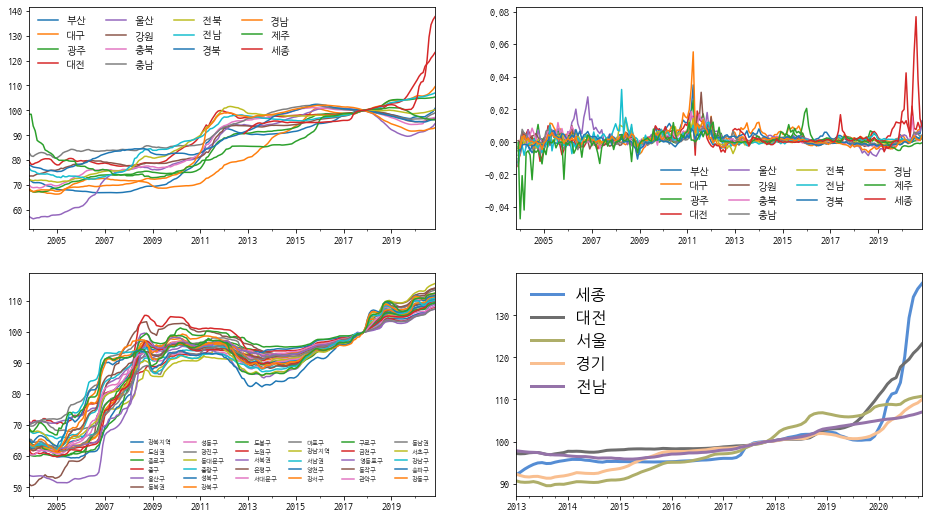

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))

df[nsm].plot(ax=ax[0, 0])
ax[0,0].legend(ncol=4, frameon=False)

df[nsm].pct_change().plot(ax=ax[0, 1])
ax[0,1].legend(ncol=4, frameon=False)

df.filter(like='서울').plot(ax=ax[1, 0])
seoul = df.filter(like='서울-').columns
legend = [j for i,j in seoul.str.split('-').tolist()]
ax[1,0].legend(legend, ncol=6, frameon=False, fontsize=6)

df.loc['2013':, big5].plot(ax=ax[1, 1], lw=3, color=lcolors)
ax[1,1].legend(ncol=1, frameon=False, fontsize=16)